Проведён первичный разведочный анализ данных (EDA) для датасета по различным типам мутаций в гене TP53 человека и послдествиям этих мутаций для транрипта и белка.
Проверены структура данных, полнота, уникальность, содержимое кажого столбца, корреляции сежду данными.

# Загрузка необходимых пакетов 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #визуализация
import matplotlib.pyplot as plt             #визуализация
%matplotlib inline     
sns.set(color_codes=True)

# Чтение файла
Чтение файла с устройства

In [2]:
#чтение файла, вывод первых 3 и последних 3 строк
df = pd.read_csv(r'C:\data_eng\frequent-mutations.2025-09-28.tsv', sep = '\t')

# Анализ структуры данных
Вывод первыых 4 и послених 4 строк таблицы, оценка размера таблицы и проверка типов данных

In [3]:
('Первые 4 строки таблицы')
print(df.head(4))
print()

('Последние 4 строки таблицы')
print(df.tail(4))
print()

#размер таблицы
print('Размер таблицы')
print(df.shape)
print()

#проверка типов данных
print('Типы данных')
print(df.dtypes)

                                 ssm_id          dna_change protein_change  \
0  8e30604f-3a45-5533-bdd7-0a4353700318  chr17:g.7675088C>T     TP53 R175H   
1  8d2dfec2-3a12-511c-90e9-3e29c039b548  chr17:g.7674220C>T     TP53 R248Q   
2  477e2125-974b-5af0-a876-25596d99ddbf  chr17:g.7673803G>A     TP53 R273C   
3  b5249474-20f8-5245-8dc0-c548405baaa2  chr17:g.7673802C>T     TP53 R273H   

           type consequence  num_ssm_affected_cases  num_TP53_cases  \
0  Substitution    Missense                     206            7431   
1  Substitution    Missense                     161            7431   
2  Substitution    Missense                     145            7431   
3  Substitution    Missense                     129            7431   

   ssm_affected_cases_percentage  num_gdc_ssm_affected_cases  \
0                           2.77                         206   
1                           2.17                         161   
2                           1.95                         145 

# Изменение названий столбцов для более удобной работы

In [4]:
#изменение названий столбцов
df = df.rename(columns={'ssm_id': 'ID', 'type': 'type_of_mutation', 'consequence': 'consequence_for_transcript', 'num_ssm_affected_cases': 'num_mut_acrossTP53', 'num_TP53_cases': 'num_all_TP53_mut', 'ssm_affected_cases_percentage': 'perc_mut_to_allTP53mut', 'num_gdc_ssm_affected_cases': 'num_this_mut_acrossall', 'num_gdc_ssm_cases': 'num_allmut', 'gdc_ssm_affected_cases_percentage': 'perc_thismut_to_allmut'})
df.head(4)

,ID,dna_change,protein_change,type_of_mutation,consequence_for_transcript,num_mut_acrossTP53,num_all_TP53_mut,perc_mut_to_allTP53mut,num_this_mut_acrossall,num_allmut,perc_thismut_to_allmut,vep_impact,sift_impact,sift_score,polyphen_impact,polyphen_score
0,8e30604f-3a45-5533-bdd7-0a4353700318,chr17:g.7675088C>T,TP53 R175H,Substitution,Missense,206,7431,2.77,206,16747,1.23,MODERATE,tolerated,0.11,benign,0.319
1,8d2dfec2-3a12-511c-90e9-3e29c039b548,chr17:g.7674220C>T,TP53 R248Q,Substitution,Missense,161,7431,2.17,161,16747,0.96,MODERATE,deleterious,0.00,probably_damaging,0.994
2,477e2125-974b-5af0-a876-25596d99ddbf,chr17:g.7673803G>A,TP53 R273C,Substitution,Missense,145,7431,1.95,145,16747,0.87,MODERATE,deleterious,0.00,probably_damaging,0.999
3,b5249474-20f8-5245-8dc0-c548405baaa2,chr17:g.7673802C>T,TP53 R273H,Substitution,Missense,129,7431,1.74,129,16747,0.77,MODERATE,tolerated,0.13,possibly_damaging,0.643


# Оценка качества данных
Был произведен поиск дупликатов строк, поиск пропусков данных, а также поиск выбросов и проверка значений индексов. По результатам анализа не было найдено дупликатов и выбросов, однако были найдены пропуски в данных. Было решено, что строки с пропусками удалять не стоит, поскольку значения в других столбцах тех же сток могут дать полезную информацию для анализа других показателей. По результату анализа значений индексов все значения находятся в пределах от 0 до 1 как и должно быть.

In [5]:
#проверка на наличие дупликатов строк
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(0, 16)

In [6]:
#проверка на пропуски в данных. Поскольку пропуски есть только в 4 столбцах, строки с пропусками могут дать полезную информацию для анализа других показателей и удалять их не стоит 
print(df.isnull().sum())

ID                              0
dna_change                      0
protein_change                  0
type_of_mutation                0
consequence_for_transcript      0
num_mut_acrossTP53              0
num_all_TP53_mut                0
perc_mut_to_allTP53mut          0
num_this_mut_acrossall          0
num_allmut                      0
perc_thismut_to_allmut          0
vep_impact                      0
sift_impact                   862
sift_score                    862
polyphen_impact               862
polyphen_score                862
dtype: int64


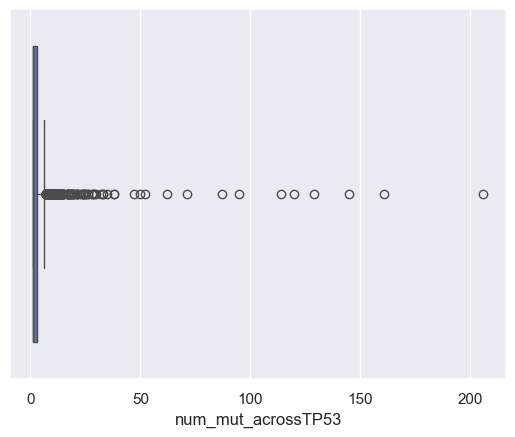

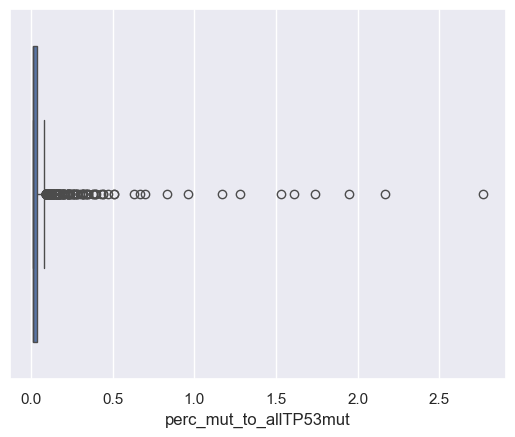

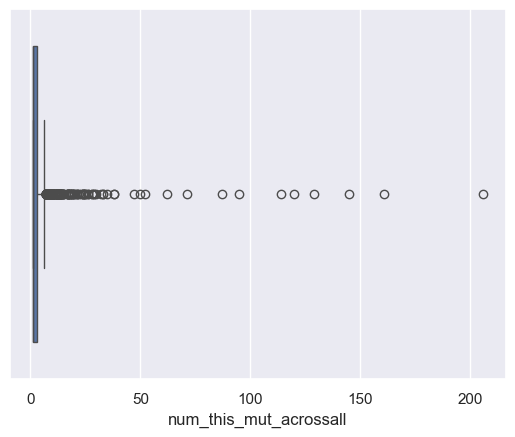

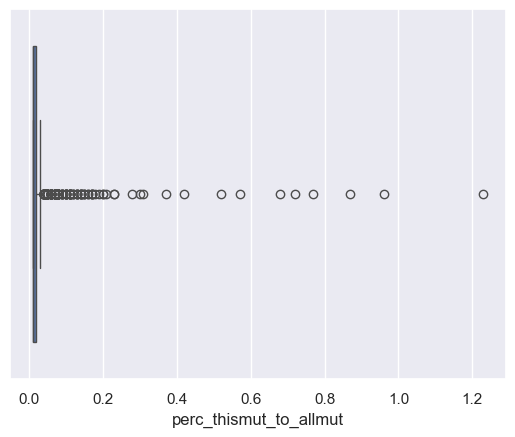

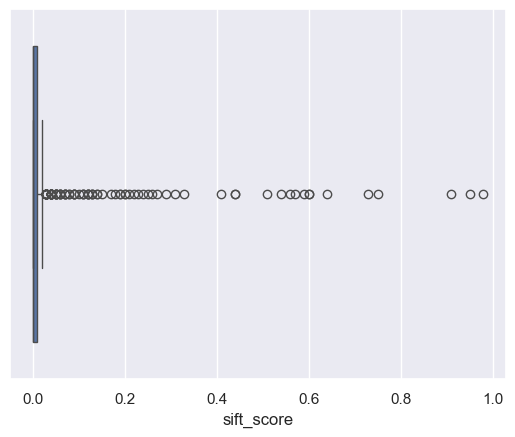

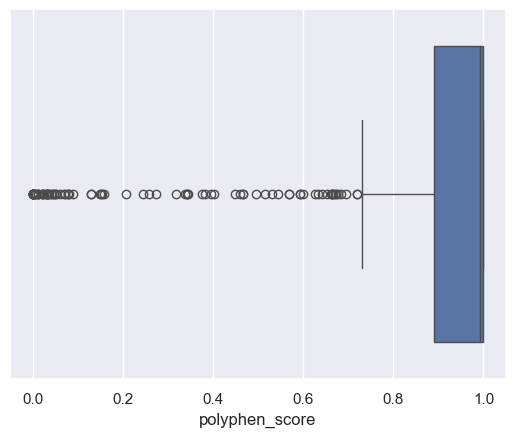

In [7]:
#поиск выбросов
#num_mut_acrossTP53 и perc_mut_to_allTP53mut - количество случаев, в которых была зарегестрирована эта мутация. Выбросы удалять не нужно, поскольку, вероятно, за выбросы будут встречаться самые частые мутации
sns.boxplot(x=df['num_mut_acrossTP53'])
plt.show()
sns.boxplot(x=df['perc_mut_to_allTP53mut'])
plt.show()

#num_this_mut_acrossall и perc_thismut_to_allmut - аналогично
sns.boxplot(x=df['num_this_mut_acrossall'])
plt.show()
sns.boxplot(x=df['perc_thismut_to_allmut'])
plt.show()

#значения индексов должны быть пределе от 0 до 1, что верно для данного дата сета
sns.boxplot(x=df['sift_score'])
plt.show()
sns.boxplot(x=df['polyphen_score'])
plt.show()

In [8]:
#дополнительная проверка что все значения индексов soft score и polyphen score находятся в пределах от 0 до 1
df_invalid = df[(df['sift_score'] < 0) | (df['sift_score'] > 1)]
if not df_invalid.empty:
    print('Следующие значения индексов sift score выходят за пределы от 0 до 1', df_invalid)
else:
    print('Все индексы sift score находятся в пределах от 0 до 1')

df_invalid = df[(df['polyphen_score'] < 0) | (df['polyphen_score'] > 1)]
if not df_invalid.empty:
    print('Следующие значения индексов polyphen score выходят за пределы от 0 до 1', df_invalid)
else:
    print('Все индексы polyphen score находятся в пределах от 0 до 1')

Все индексы sift score находятся в пределах от 0 до 1
Все индексы polyphen score находятся в пределах от 0 до 1


# Первичная оценка данных
Была проведена оценка объема анализа (количество изучаемых мутаций) и проверка содержимого категориальных столбцов 

In [9]:
#оценка объема данных
print('Количество изученных мутаций в TP53:', (df['num_all_TP53_mut'][0]))
print('Общее количество мутаций в базе данных:', (df['num_allmut'][0]))

Количество изученных мутаций в TP53: 7431
Общее количество мутаций в базе данных: 16747


In [10]:
#проверка значений в столбцах с типами мутаций и индексами, показывающими влияние на функционал белка
print('Типы мутаций', df['type_of_mutation'].unique())
print()
print('Варианты изменений трансрипта', df['consequence_for_transcript'].unique())
print()
print('vep_impact', df['vep_impact'].unique())
print()
print('sift_impact', df['sift_impact'].unique())
print()
print('polyphen_impact', df['polyphen_impact'].unique())
print()

Типы мутаций ['Substitution' 'Deletion' 'Insertion']

Варианты изменений трансрипта ['Missense' 'Stop Gained' 'Splice Region' 'Splice Acceptor' 'Frameshift'
 'Splice Donor' 'Inframe Deletion' 'Synonymous' 'Intron'
 'Inframe Insertion' 'Protein Altering' 'Start Lost' '3 Prime Utr'
 'Stop Retained' 'Stop Lost' '5 Prime Utr']

vep_impact ['MODERATE' 'HIGH' 'LOW' 'MODIFIER']

sift_impact ['tolerated' 'deleterious' nan 'deleterious_low_confidence']

polyphen_impact ['benign' 'probably_damaging' 'possibly_damaging' nan]



# Изучение корреляций
Хорошая отрицательная корреляция между столбцами sift_score и polyphen_score подтверждает правильность подсчёта индексов.

Столбец perc_mut_to_allTP53mut явялется результатом деления значений толбца num_mut_acrossTP53 на фиксированное значение, что объясняет корреляцию 1. Однако, эти значения могут пригодиться в дальнейших расчётм, поэтому пока что мы не будет удалять эту величину.

Полная положительная корреляция между столбцами num_mut_acrossTP53 и num_this_mut_acrossall указывает на то, что столбцы содержат только одинаковые значения - оба столбца показывают количество мутаций такого типа в базе данных. Один из этих столбцов стоит удалить

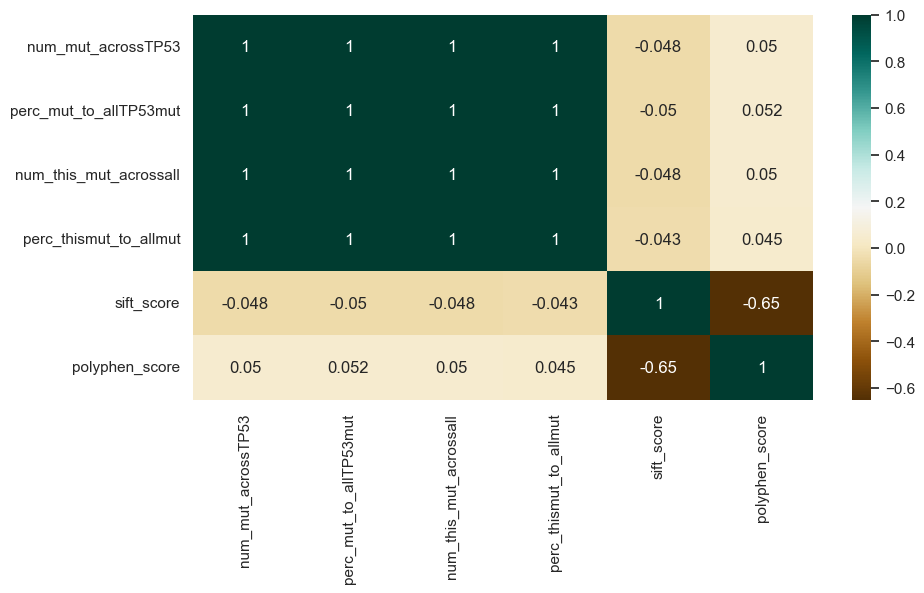

In [11]:
#строим heat map корреляций для столбюцов с числовыми значнеиями. Убирает столбцы num_all_TP55_mut и num_allmut, поскольку в этих столбцах только одно значение
plt.figure(figsize=(10,5))
cols = ['num_mut_acrossTP53', 'perc_mut_to_allTP53mut', 'num_this_mut_acrossall', 'perc_thismut_to_allmut', 'sift_score', 'polyphen_score']
c= df[cols].corr()
sns.heatmap(c,cmap="BrBG",annot=True)
plt.show()

# Выводы
Представленные данные достаточно высокго качества, не содержат дупликатов и выбросов, однако индексы влияния мутаций на функцию белка есть не для всех мутаций.
В дата сете содержать

Наличие нескольких индексов для оценки влияния мутации на функцию белка нужно потому, что каждый индекс использует разные подходы и данные для предсказания, и ни один из них сам по себе не даёт полной картины. Поэтому наличие нескольих индексов позволит производить более точный анализ.
